In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('covid_data.csv')
print("Initial shape:", df.shape)
df.head()

Initial shape: (429435, 67)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [6]:
#Data cleaning and Processing
df['date'] = pd.to_datetime(df['date'])

#Filtering out aggregate 'World' data if not needed
df=df[df['iso_code']!= 'OWID_WRL']

#Selecting relevant columns for analysis
df_subset = df[['location', 'date', 'total_cases','new_cases', 'total_deaths', 'new_deaths', 'people_vaccinated', 'population']]

#Check Missing values
print("Missing values:", df_subset.isnull().sum())


Missing values: location                  0
date                      0
total_cases           17621
new_cases             19266
total_deaths          17621
new_deaths            18817
people_vaccinated    347971
population                0
dtype: int64


In [7]:
#Fill Missing Values forward (for time series continuity)
df_subset.sort_values(['location','date'],inplace=True)
df_subset.fillna(method='ffill',inplace=True)

C:\Users\rajat\AppData\Local\Temp\ipykernel_14576\1072598344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.sort_values(['location','date'],inplace=True)
C:\Users\rajat\AppData\Local\Temp\ipykernel_14576\1072598344.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_subset.fillna(method='ffill',inplace=True)
C:\Users\rajat\AppData\Local\Temp\ipykernel_14576\1072598344.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset.fillna(method='ffill',inplace=True)


C:\Users\rajat\AppData\Local\Temp\ipykernel_14576\626571272.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_india['new_cases_7d_avg'] = df_india['new_cases'].rolling(7).mean()


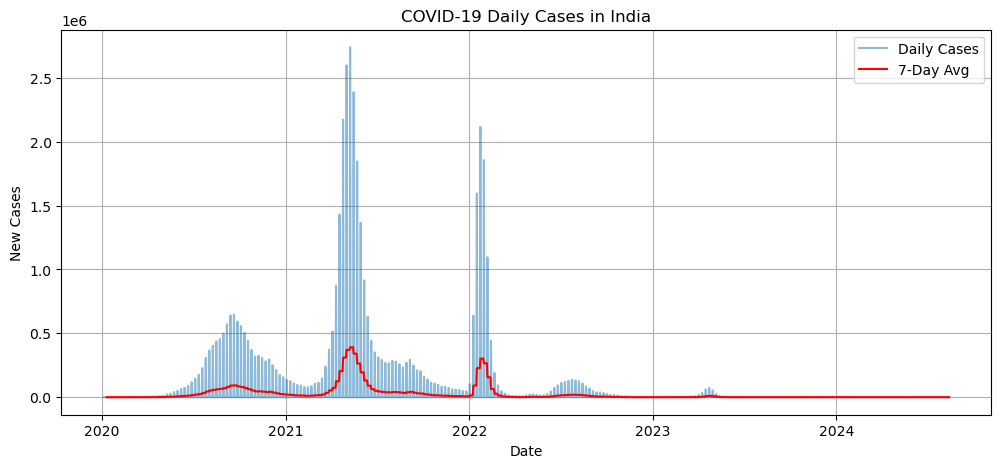

In [9]:
# Plot Daily Cases Trend for a Specific Country (e.g., India)
country = 'India'
df_india = df_subset[df_subset['location'] == country]

#Rolling average 7 days
df_india['new_cases_7d_avg'] = df_india['new_cases'].rolling(7).mean()

plt.figure(figsize=(12,5))
plt.plot(df_india['date'], df_india['new_cases'],label='Daily Cases',alpha=0.5)
plt.plot(df_india['date'], df_india['new_cases_7d_avg'],label='7-Day Avg',color='red')
plt.title(f'COVID-19 Daily Cases in {country}')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.grid(True)
plt.show()

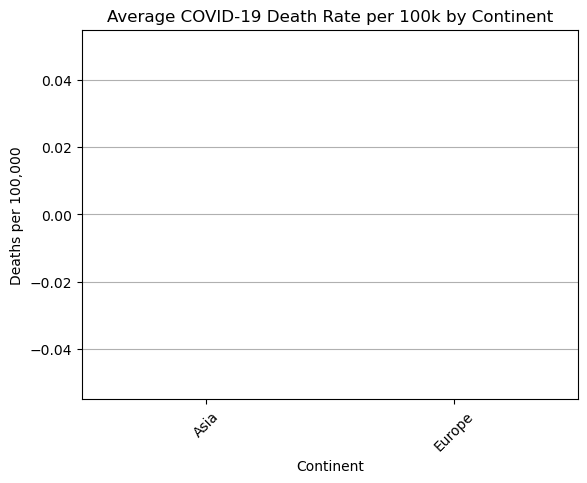


Death rate by continent:
 continent
Asia     NaN
Europe   NaN
Name: death_rate_per_100k, dtype: float64


In [12]:
# Include only recent date
latest_date = df_subset['date'].max()
df_latest = df[df['date'] == latest_date]

# Drop aggregates and keep only countries
df_latest = df_latest[df_latest['continent'].notnull()]

# Calculate death rate per 100k
df_latest['death_rate_per_100k'] = (df_latest['total_deaths'] / df_latest['population']) * 100000

# Group by continent
continent_death_rate = df_latest.groupby('continent')['death_rate_per_100k'].mean().sort_values(ascending=False)

# Plot
continent_death_rate.plot(kind='bar', color='red')
plt.title('Average COVID-19 Death Rate per 100k by Continent')
plt.ylabel('Deaths per 100,000')
plt.xlabel('Continent')
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.show()

print("\nDeath rate by continent:\n", continent_death_rate)
